In [1]:
from sklearn.linear_model import LogisticRegression 
LogisticRegression()

LogisticRegression()

__LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)__

__Here we are just focusing on C=1.0 hytperparameter.
**C hyperparameter** is just a regularization parameter that controls how closely the model fits to the training data.
**Regularization** is a technique used to reduce overfitting by discouraging overly complex model in some way__

we're going to use the grid search CV tool to do grid search within K-fold cross-validation in order to find the optimal hyper parameter settings for logistic regression that generates the best model on our data. Now, if you're unfamiliar with K-fold cross-validation it basically just takes your data set and splits it into K subsets. Then it will iterate through those K subsets, K times, and then on each loop, it will fit a model on K minus one subsets, and then test it on the remaining subset. So it will generate performance metrics for each loop. And it's a great way to robustly train and test your model because it essentially gives you model performance metrics based on each example in your dataset. 

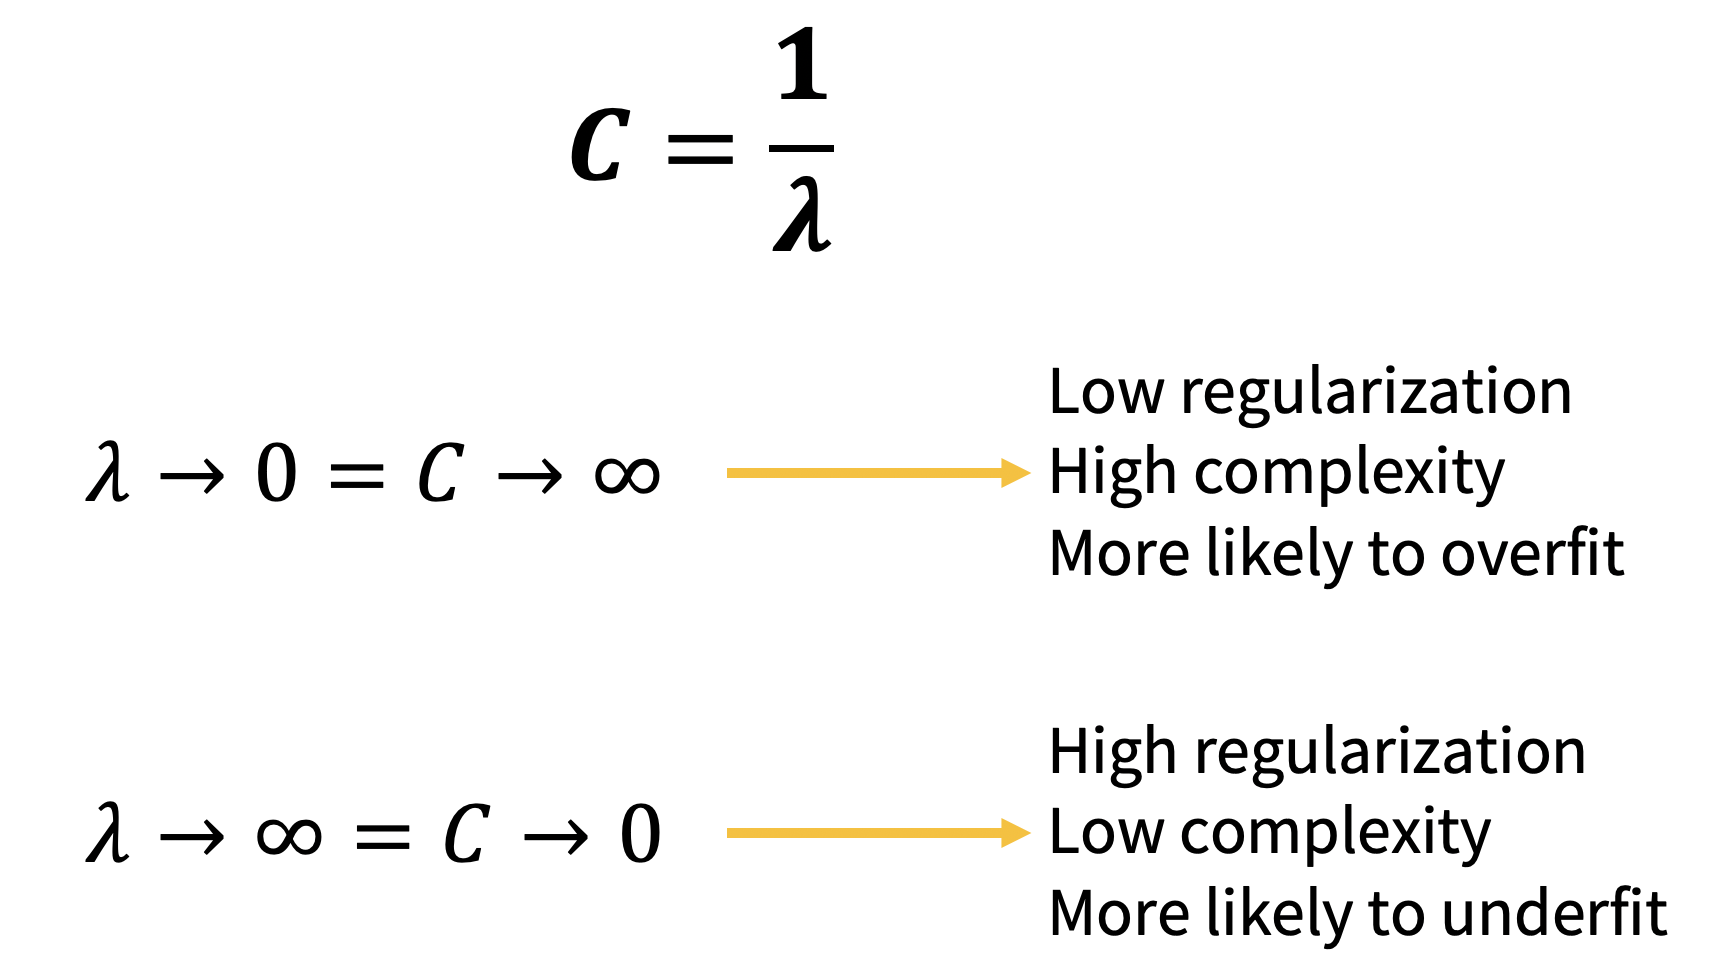

In [2]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
# we're going to use this warnings package to suppress these warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
tr_features= pd.read_csv('/ML/Applied ML Algorithms/L1/train_features.csv')
tr_labels=pd.read_csv('/ML/Applied ML Algorithms/L1/train_label.csv')
tr_labels.head(5)

,Survived
0,1
1,0
2,1
3,0
4,1


In [3]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [4]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

BEST PARAMS: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


In [5]:
cv.best_estimator_

LogisticRegression(C=1)

In [6]:
joblib.dump(cv.best_estimator_, '/ML/Applied ML Algorithms/Models/LR_model.pkl')

['/ML/Applied ML Algorithms/Models/LR_model.pkl']